# Lab 4.1: Deep Network Architecture with TensorFlow

## Duration: 45 minutes

## Learning Objectives
By the end of this lab, you will be able to:
- Design and implement deep neural network architectures using TensorFlow/Keras
- Understand different layer types and their applications
- Configure weight initialization strategies in TensorFlow
- Build flexible neural network architectures for various tasks
- Compare traditional implementation with modern framework approaches

## Prerequisites
- Basic understanding of neural networks from previous labs
- Knowledge of Python and NumPy
- TensorFlow installed and working

## Key Concepts
- **TensorFlow/Keras**: High-level deep learning framework
- **Sequential vs Functional API**: Different ways to build models
- **Layer Types**: Dense, Dropout, BatchNormalization, etc.
- **Weight Initializers**: Built-in initialization strategies
- **Model Architecture**: Modern approaches to network design

## Setup and Imports

First, let's import all necessary libraries and set up our environment.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, initializers
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Configure matplotlib for better plots
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)

print("Environment setup complete!")
print(f"NumPy version: {np.__version__}")
print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")

# Check if GPU is available
if tf.config.list_physical_devices('GPU'):
    print("✅ GPU is available")
else:
    print("💻 Using CPU (GPU not available)")

Environment setup complete!
NumPy version: 2.3.2
TensorFlow version: 2.20.0
Keras version: 3.11.3
💻 Using CPU (GPU not available)


## Step 1: Understanding TensorFlow/Keras Architecture Building

TensorFlow/Keras provides two main approaches for building neural networks:
- **Sequential API**: Linear stack of layers (simpler)
- **Functional API**: More flexible, allows complex architectures

Let's explore both approaches and understand modern deep learning architecture patterns:

Creating Different Network Architectures with TensorFlow:


Shallow Network: [4, 8, 1]
✅ Sequential model created - Total parameters: 49
✅ Functional model created - Total parameters: 49

Deep Network: [784, 256, 128, 64, 10]
✅ Sequential model created - Total parameters: 242,762
✅ Functional model created - Total parameters: 242,762

Deep Network (Sequential API)


Model: "DeepNN_Sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

You must install pydot (`pip install pydot`) for `plot_model` to work.


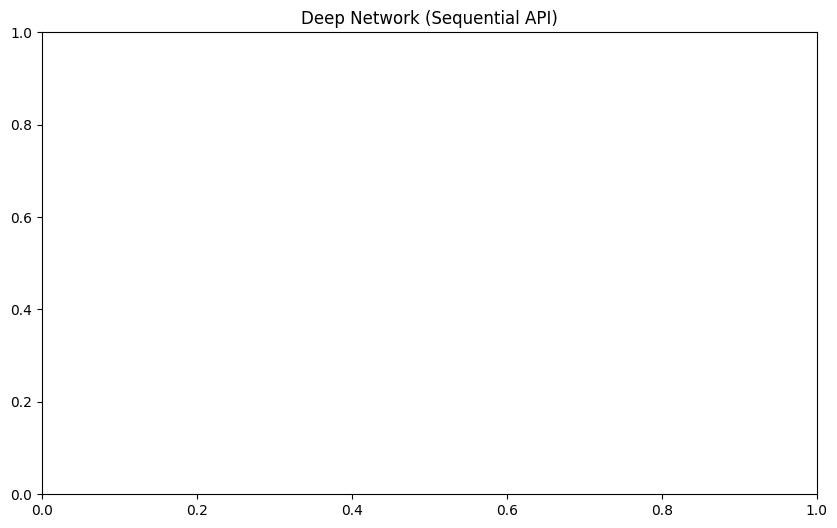


Very Deep Network: [784, 512, 256, 128, 64, 32, 10]
✅ Sequential model created - Total parameters: 576,810
✅ Functional model created - Total parameters: 576,810


In [7]:
def create_sequential_model(layer_sizes, activation='relu', output_activation='linear'):
    """
    Create a neural network using Sequential API
    
    Parameters:
    layer_sizes: list of integers representing number of neurons in each layer
    activation: activation function for hidden layers
    output_activation: activation function for output layer
    
    Returns:
    model: Keras Sequential model
    """
    model = keras.Sequential(name='DeepNN_Sequential')
    
    # Add input layer (first hidden layer)
    model.add(layers.Dense(layer_sizes[1], 
                          input_shape=(layer_sizes[0],),
                          activation=activation,
                          name=f'dense_1'))
    
    # Add hidden layers
    for i in range(2, len(layer_sizes)-1):
        model.add(layers.Dense(layer_sizes[i], 
                              activation=activation,
                              name=f'dense_{i}'))
    
    # Add output layer
    model.add(layers.Dense(layer_sizes[-1], 
                          activation=output_activation,
                          name='output'))
    
    return model

def create_functional_model(layer_sizes, activation='relu', output_activation='linear'):
    """
    Create a neural network using Functional API
    
    Parameters:
    layer_sizes: list of integers representing number of neurons in each layer
    activation: activation function for hidden layers
    output_activation: activation function for output layer
    
    Returns:
    model: Keras Functional model
    """
    # Define input
    inputs = layers.Input(shape=(layer_sizes[0],), name='input')
    
    # First hidden layer
    x = layers.Dense(layer_sizes[1], activation=activation, name='dense_1')(inputs)
    
    # Additional hidden layers
    for i in range(2, len(layer_sizes)-1):
        x = layers.Dense(layer_sizes[i], activation=activation, name=f'dense_{i}')(x)
    
    # Output layer
    outputs = layers.Dense(layer_sizes[-1], activation=output_activation, name='output')(x)
    
    # Create model
    model = keras.Model(inputs=inputs, outputs=outputs, name='DeepNN_Functional')
    
    return model

def visualize_model_architecture(model, title="Neural Network Architecture"):
    """
    Visualize model architecture using TensorFlow's built-in plotting
    """
    print(f"\n{title}")
    print("=" * 60)
    
    # Print model summary
    model.summary()
    
    # Plot model architecture
    try:
        keras.utils.plot_model(model, 
                              show_shapes=True, 
                              show_layer_names=True,
                              rankdir='LR',
                              show_dtype=False)
        plt.title(title)
        plt.show()
    except ImportError:
        print("Note: Install pydot and graphviz for visual model plots")
    
    return model

# Example architectures
architectures = {
    'Shallow Network': [4, 8, 1],
    'Deep Network': [784, 256, 128, 64, 10],
    'Very Deep Network': [784, 512, 256, 128, 64, 32, 10]
}

print("Creating Different Network Architectures with TensorFlow:")
print()

for name, arch in architectures.items():
    print(f"\n{name}: {arch}")
    
    # Create using Sequential API
    seq_model = create_sequential_model(arch)
    print(f"✅ Sequential model created - Total parameters: {seq_model.count_params():,}")
    
    # Create using Functional API  
    func_model = create_functional_model(arch)
    print(f"✅ Functional model created - Total parameters: {func_model.count_params():,}")
    
    # Show detailed architecture for first model
    if name == 'Deep Network':
        visualize_model_architecture(seq_model, f"{name} (Sequential API)")

## Step 2: Weight Initialization in TensorFlow

TensorFlow provides many built-in initialization strategies. Let's explore and compare them:

Testing TensorFlow Weight Initializers:

glorot_uniform : Shape (100, 64), Mean: 0.0006, Std: 0.1098
glorot_normal  : Shape (100, 64), Mean: 0.0021, Std: 0.1105
he_uniform     : Shape (100, 64), Mean: -0.0014, Std: 0.1413
he_normal      : Shape (100, 64), Mean: -0.0017, Std: 0.1421
random_uniform : Shape (100, 64), Mean: -0.0002, Std: 0.0289
random_normal  : Shape (100, 64), Mean: 0.0010, Std: 0.0500

Visualizing weight distributions:


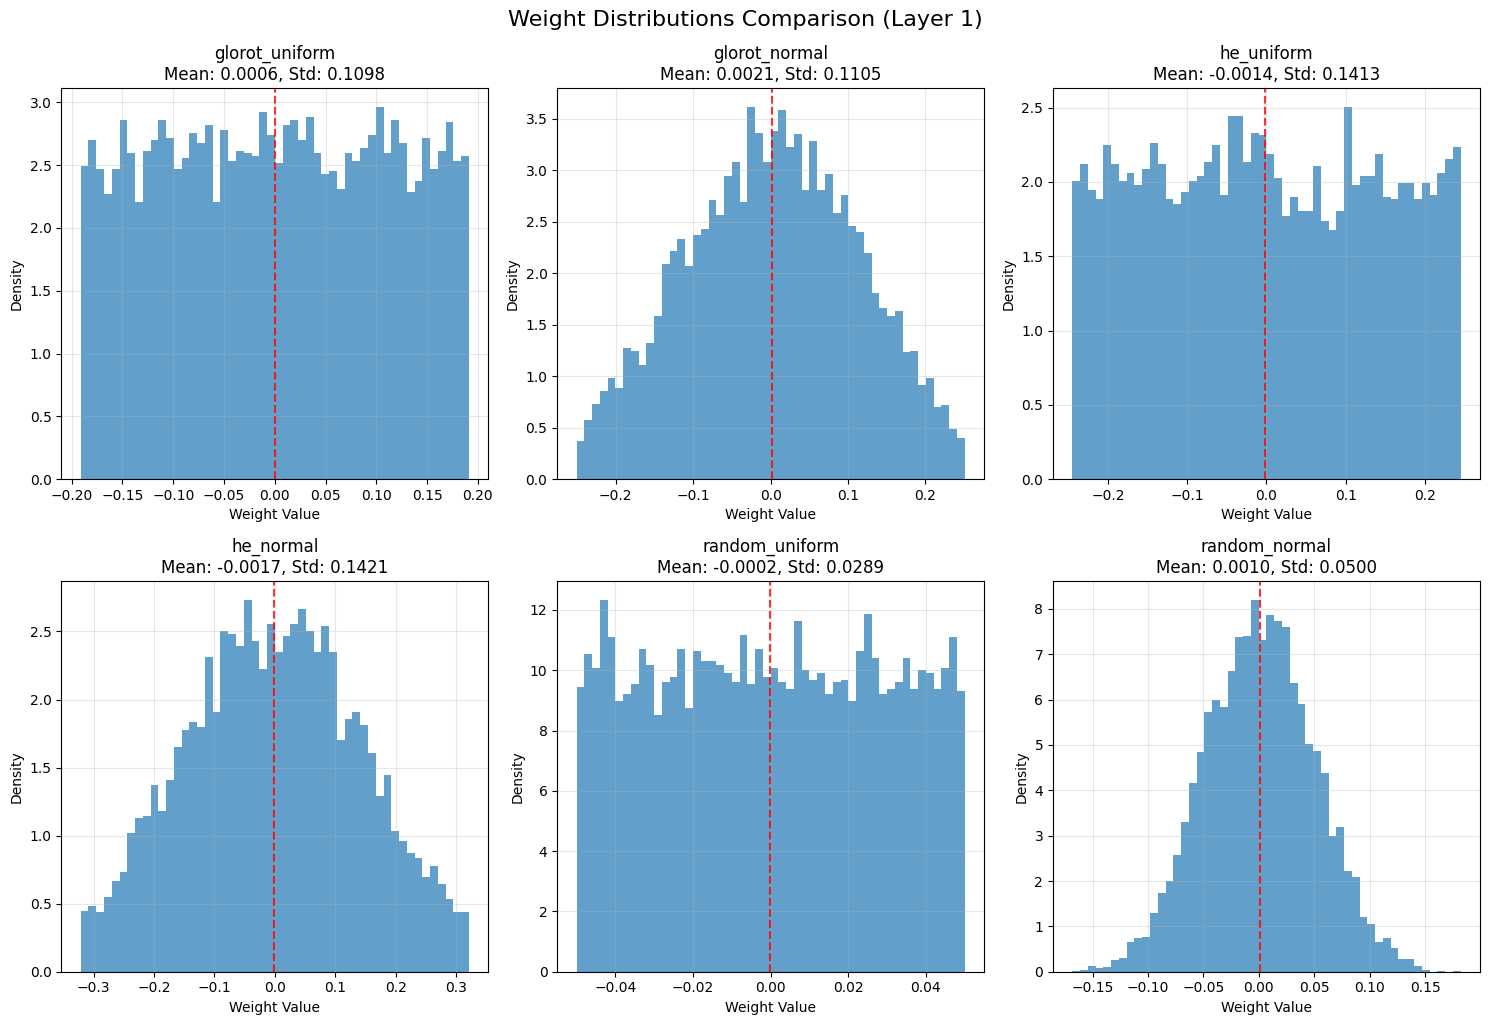


Detailed Comparison: Xavier vs He Initialization
------------------------------------------------------------
Xavier Normal - Mean: -0.001302, Std: 0.110149
He Normal     - Mean: -0.001473, Std: 0.141222

Key Differences:
- Xavier initialization: Good for tanh, sigmoid activations
- He initialization: Optimized for ReLU and its variants
- He uses larger initial weights to compensate for ReLU's zero-killing property


In [8]:
def create_model_with_initializer(layer_sizes, kernel_initializer='he_normal', bias_initializer='zeros'):
    """
    Create model with specific weight initialization
    
    Parameters:
    layer_sizes: list of layer sizes
    kernel_initializer: weight initialization strategy
    bias_initializer: bias initialization strategy
    
    Returns:
    model: Keras model with specified initialization
    """
    model = keras.Sequential(name=f'Model_{kernel_initializer}')
    
    # Input layer
    model.add(layers.Dense(layer_sizes[1], 
                          input_shape=(layer_sizes[0],),
                          activation='relu',
                          kernel_initializer=kernel_initializer,
                          bias_initializer=bias_initializer,
                          name=f'dense_1'))
    
    # Hidden layers
    for i in range(2, len(layer_sizes)-1):
        model.add(layers.Dense(layer_sizes[i], 
                              activation='relu',
                              kernel_initializer=kernel_initializer,
                              bias_initializer=bias_initializer,
                              name=f'dense_{i}'))
    
    # Output layer
    model.add(layers.Dense(layer_sizes[-1], 
                          activation='linear',
                          kernel_initializer=kernel_initializer,
                          bias_initializer=bias_initializer,
                          name='output'))
    
    return model

def analyze_weight_distributions(models_dict, layer_index=0):
    """
    Analyze and visualize weight distributions from different models
    
    Parameters:
    models_dict: dictionary of models with their initializer names
    layer_index: which layer to analyze (0-indexed)
    """
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.ravel()
    
    for idx, (init_name, model) in enumerate(models_dict.items()):
        if idx >= len(axes):
            break
            
        # Get weights from specified layer
        weights = model.layers[layer_index].get_weights()[0]  # [0] for kernel weights
        
        # Plot histogram
        axes[idx].hist(weights.ravel(), bins=50, alpha=0.7, density=True)
        axes[idx].set_title(f'{init_name}\nMean: {weights.mean():.4f}, Std: {weights.std():.4f}')
        axes[idx].set_xlabel('Weight Value')
        axes[idx].set_ylabel('Density')
        axes[idx].grid(True, alpha=0.3)
        axes[idx].axvline(weights.mean(), color='red', linestyle='--', alpha=0.8)
    
    # Remove unused subplots
    for idx in range(len(models_dict), len(axes)):
        axes[idx].remove()
    
    plt.tight_layout()
    plt.suptitle(f'Weight Distributions Comparison (Layer {layer_index + 1})', y=1.02, fontsize=16)
    plt.show()

# Test different TensorFlow initializers
print("Testing TensorFlow Weight Initializers:")
print()

test_architecture = [100, 64, 32, 1]

# Available initializers in TensorFlow
tf_initializers = {
    'glorot_uniform': 'glorot_uniform',     # Xavier uniform
    'glorot_normal': 'glorot_normal',       # Xavier normal
    'he_uniform': 'he_uniform',             # He uniform
    'he_normal': 'he_normal',               # He normal
    'random_uniform': 'random_uniform',     # Random uniform
    'random_normal': 'random_normal'        # Random normal
}

# Create models with different initializers
models = {}
for name, init in tf_initializers.items():
    model = create_model_with_initializer(test_architecture, kernel_initializer=init)
    models[name] = model
    
    # Get first layer weights for analysis
    first_layer_weights = model.layers[0].get_weights()[0]
    print(f"{name:15}: Shape {first_layer_weights.shape}, "
          f"Mean: {first_layer_weights.mean():.4f}, "
          f"Std: {first_layer_weights.std():.4f}")

print("\nVisualizing weight distributions:")
analyze_weight_distributions(models, layer_index=0)

# Show detailed comparison between Xavier and He initialization
print("\nDetailed Comparison: Xavier vs He Initialization")
print("-" * 60)

xavier_model = create_model_with_initializer(test_architecture, kernel_initializer='glorot_normal')
he_model = create_model_with_initializer(test_architecture, kernel_initializer='he_normal')

xavier_weights = xavier_model.layers[0].get_weights()[0]
he_weights = he_model.layers[0].get_weights()[0]

print(f"Xavier Normal - Mean: {xavier_weights.mean():.6f}, Std: {xavier_weights.std():.6f}")
print(f"He Normal     - Mean: {he_weights.mean():.6f}, Std: {he_weights.std():.6f}")
print()
print("Key Differences:")
print("- Xavier initialization: Good for tanh, sigmoid activations")
print("- He initialization: Optimized for ReLU and its variants")
print("- He uses larger initial weights to compensate for ReLU's zero-killing property")

## Step 3: Advanced Layer Types and Modern Architectures

TensorFlow/Keras provides many advanced layer types that improve deep network performance:

In [9]:
def create_modern_deep_network(input_dim, num_classes, architecture_type='standard'):
    """
    Create modern deep network with advanced techniques
    
    Parameters:
    input_dim: number of input features
    num_classes: number of output classes
    architecture_type: 'standard', 'dropout', 'batch_norm', or 'advanced'
    
    Returns:
    model: Keras model with modern architecture
    """
    
    if architecture_type == 'standard':
        # Basic deep network
        model = keras.Sequential([
            layers.Dense(512, activation='relu', input_shape=(input_dim,)),
            layers.Dense(256, activation='relu'),
            layers.Dense(128, activation='relu'),
            layers.Dense(64, activation='relu'),
            layers.Dense(num_classes, activation='softmax' if num_classes > 1 else 'sigmoid')
        ], name='Standard_Deep_Network')
    
    elif architecture_type == 'dropout':
        # Network with dropout for regularization
        model = keras.Sequential([
            layers.Dense(512, activation='relu', input_shape=(input_dim,)),
            layers.Dropout(0.3),
            layers.Dense(256, activation='relu'),
            layers.Dropout(0.3),
            layers.Dense(128, activation='relu'),
            layers.Dropout(0.2),
            layers.Dense(64, activation='relu'),
            layers.Dropout(0.2),
            layers.Dense(num_classes, activation='softmax' if num_classes > 1 else 'sigmoid')
        ], name='Dropout_Deep_Network')
    
    elif architecture_type == 'batch_norm':
        # Network with batch normalization
        model = keras.Sequential([
            layers.Dense(512, input_shape=(input_dim,)),
            layers.BatchNormalization(),
            layers.Activation('relu'),
            
            layers.Dense(256),
            layers.BatchNormalization(),
            layers.Activation('relu'),
            
            layers.Dense(128),
            layers.BatchNormalization(),
            layers.Activation('relu'),
            
            layers.Dense(64),
            layers.BatchNormalization(),
            layers.Activation('relu'),
            
            layers.Dense(num_classes, activation='softmax' if num_classes > 1 else 'sigmoid')
        ], name='BatchNorm_Deep_Network')
    
    elif architecture_type == 'advanced':
        # Advanced network combining multiple techniques
        model = keras.Sequential([
            # First block
            layers.Dense(512, input_shape=(input_dim,), kernel_initializer='he_normal'),
            layers.BatchNormalization(),
            layers.Activation('relu'),
            layers.Dropout(0.3),
            
            # Second block
            layers.Dense(256, kernel_initializer='he_normal'),
            layers.BatchNormalization(),
            layers.Activation('relu'),
            layers.Dropout(0.3),
            
            # Third block
            layers.Dense(128, kernel_initializer='he_normal'),
            layers.BatchNormalization(),
            layers.Activation('relu'),
            layers.Dropout(0.2),
            
            # Fourth block
            layers.Dense(64, kernel_initializer='he_normal'),
            layers.BatchNormalization(),
            layers.Activation('relu'),
            layers.Dropout(0.2),
            
            # Output
            layers.Dense(num_classes, activation='softmax' if num_classes > 1 else 'sigmoid')
        ], name='Advanced_Deep_Network')
    
    return model

def create_residual_block(x, units, dropout_rate=0.2):
    """
    Create a residual block (simplified ResNet-style)
    
    Parameters:
    x: input tensor
    units: number of units in the block
    dropout_rate: dropout rate
    
    Returns:
    output: tensor after residual connection
    """
    # Main path
    shortcut = x
    
    # First layer
    x = layers.Dense(units, kernel_initializer='he_normal')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Dropout(dropout_rate)(x)
    
    # Second layer
    x = layers.Dense(units, kernel_initializer='he_normal')(x)
    x = layers.BatchNormalization()(x)
    
    # Residual connection (if dimensions match)
    if shortcut.shape[-1] == units:
        x = layers.Add()([shortcut, x])
    else:
        # Project shortcut to match dimensions
        shortcut = layers.Dense(units, kernel_initializer='he_normal')(shortcut)
        x = layers.Add()([shortcut, x])
    
    x = layers.Activation('relu')(x)
    return x

def create_residual_network(input_dim, num_classes):
    """
    Create a ResNet-inspired deep network
    
    Parameters:
    input_dim: number of input features
    num_classes: number of output classes
    
    Returns:
    model: Keras model with residual connections
    """
    inputs = layers.Input(shape=(input_dim,))
    
    # Initial dense layer
    x = layers.Dense(256, activation='relu', kernel_initializer='he_normal')(inputs)
    
    # Residual blocks
    x = create_residual_block(x, 256, 0.2)
    x = create_residual_block(x, 256, 0.2)
    x = create_residual_block(x, 128, 0.2)
    x = create_residual_block(x, 128, 0.2)
    x = create_residual_block(x, 64, 0.1)
    
    # Global average pooling and output
    x = layers.GlobalAveragePooling1D()(tf.expand_dims(x, axis=1))
    outputs = layers.Dense(num_classes, activation='softmax' if num_classes > 1 else 'sigmoid')(x)
    
    model = keras.Model(inputs=inputs, outputs=outputs, name='Residual_Deep_Network')
    return model

# Create and compare different modern architectures
print("Creating Modern Deep Network Architectures:")
print("=" * 60)

input_dim = 784  # MNIST-like
num_classes = 10

architecture_types = ['standard', 'dropout', 'batch_norm', 'advanced']

models = {}
for arch_type in architecture_types:
    model = create_modern_deep_network(input_dim, num_classes, arch_type)
    models[arch_type] = model
    
    print(f"\n{arch_type.upper()} Architecture:")
    print(f"  Total parameters: {model.count_params():,}")
    print(f"  Number of layers: {len(model.layers)}")

# Create residual network
print(f"\nRESIDUAL Architecture:")
residual_model = create_residual_network(input_dim, num_classes)
models['residual'] = residual_model
print(f"  Total parameters: {residual_model.count_params():,}")
print(f"  Number of layers: {len(residual_model.layers)}")

# Show detailed summary for advanced model
print(f"\nDetailed Architecture - ADVANCED Model:")
print("-" * 40)
models['advanced'].summary()

Creating Modern Deep Network Architectures:

STANDARD Architecture:
  Total parameters: 575,050
  Number of layers: 5

DROPOUT Architecture:
  Total parameters: 575,050
  Number of layers: 9

BATCH_NORM Architecture:
  Total parameters: 578,890
  Number of layers: 13

ADVANCED Architecture:
  Total parameters: 578,890
  Number of layers: 17

RESIDUAL Architecture:


ValueError: A KerasTensor cannot be used as input to a TensorFlow function. A KerasTensor is a symbolic placeholder for a shape and dtype, used when constructing Keras Functional models or Keras Functions. You can only use it as input to a Keras layer or a Keras operation (from the namespaces `keras.layers` and `keras.ops`). You are likely doing something like:

```
x = Input(...)
...
tf_fn(x)  # Invalid.
```

What you should do instead is wrap `tf_fn` in a layer:

```
class MyLayer(Layer):
    def call(self, x):
        return tf_fn(x)

x = MyLayer()(x)
```


## Step 4: Parameter Inspection and Analysis

Let's analyze the initialized parameters and understand their properties:

In [ ]:
def analyze_network_parameters(network, layer_to_analyze=1):
    """
    Analyze and visualize network parameters
    
    Parameters:
    network: DeepNeuralNetwork instance
    layer_to_analyze: which layer to analyze in detail
    """
    print(f"Analyzing parameters for layer {layer_to_analyze}:")
    
    W_key = f'W{layer_to_analyze}'
    b_key = f'b{layer_to_analyze}'
    
    weights = network.parameters[W_key]
    biases = network.parameters[b_key]
    
    print(f"\nWeight matrix {W_key}:")
    print(f"  Shape: {weights.shape}")
    print(f"  Mean: {weights.mean():.6f}")
    print(f"  Std: {weights.std():.6f}")
    print(f"  Min: {weights.min():.6f}")
    print(f"  Max: {weights.max():.6f}")
    
    print(f"\nBias vector {b_key}:")
    print(f"  Shape: {biases.shape}")
    print(f"  Mean: {biases.mean():.6f}")
    print(f"  Std: {biases.std():.6f}")
    
    # Visualize weight distributions
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Weight histogram
    axes[0].hist(weights.ravel(), bins=50, alpha=0.7, color='blue', density=True)
    axes[0].set_title(f'Weight Distribution - Layer {layer_to_analyze}')
    axes[0].set_xlabel('Weight Value')
    axes[0].set_ylabel('Density')
    axes[0].grid(True, alpha=0.3)
    axes[0].axvline(weights.mean(), color='red', linestyle='--', label=f'Mean: {weights.mean():.4f}')
    axes[0].legend()
    
    # Weight matrix heatmap
    im = axes[1].imshow(weights, cmap='RdBu', aspect='auto')
    axes[1].set_title(f'Weight Matrix Heatmap - Layer {layer_to_analyze}')
    axes[1].set_xlabel('Input Neuron')
    axes[1].set_ylabel('Output Neuron')
    plt.colorbar(im, ax=axes[1])
    
    plt.tight_layout()
    plt.show()

# Analyze parameters for the small network
print("Parameter Analysis for Small Deep Network:")
analyze_network_parameters(small_network, layer_to_analyze=1)

print("\n" + "-"*60 + "\n")

# Compare different initialization methods
print("Comparing Initialization Methods:")

initialization_methods = ['random_normal', 'xavier_uniform', 'xavier_normal', 'he_uniform', 'he_normal']
test_architecture = [100, 50, 25, 1]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, init_method in enumerate(initialization_methods):
    test_network = DeepNeuralNetwork(test_architecture, initialization=init_method, random_seed=42)
    
    # Get first layer weights
    weights = test_network.parameters['W1']
    
    axes[idx].hist(weights.ravel(), bins=40, alpha=0.7, density=True)
    axes[idx].set_title(f'{init_method.replace("_", " ").title()}\nMean: {weights.mean():.4f}, Std: {weights.std():.4f}')
    axes[idx].set_xlabel('Weight Value')
    axes[idx].set_ylabel('Density')
    axes[idx].grid(True, alpha=0.3)

# Remove empty subplot
axes[-1].remove()

plt.tight_layout()
plt.suptitle('Comparison of Weight Initialization Methods', y=1.02, fontsize=16)
plt.show()

## Step 5: Architecture Design Best Practices

Let's explore best practices for designing deep network architectures:

In [ ]:
class ArchitectureDesigner:
    """
    Helper class for designing neural network architectures
    """
    
    @staticmethod
    def pyramid_architecture(input_size, output_size, num_hidden_layers, reduction_factor=2):
        """
        Create a pyramid-style architecture that gradually reduces layer size
        
        Parameters:
        input_size: number of input features
        output_size: number of output units
        num_hidden_layers: number of hidden layers
        reduction_factor: factor by which each layer is reduced
        
        Returns:
        architecture: list of layer sizes
        """
        if num_hidden_layers == 0:
            return [input_size, output_size]
        
        architecture = [input_size]
        
        # Calculate intermediate sizes
        current_size = input_size
        for i in range(num_hidden_layers):
            current_size = max(output_size, int(current_size / reduction_factor))
            architecture.append(current_size)
        
        # Ensure last layer connects to output
        if architecture[-1] != output_size:
            architecture.append(output_size)
        
        return architecture
    
    @staticmethod
    def diamond_architecture(input_size, output_size, num_hidden_layers, expansion_factor=2):
        """
        Create a diamond-style architecture that expands then contracts
        
        Parameters:
        input_size: number of input features
        output_size: number of output units
        num_hidden_layers: number of hidden layers
        expansion_factor: factor by which middle layers expand
        
        Returns:
        architecture: list of layer sizes
        """
        if num_hidden_layers == 0:
            return [input_size, output_size]
        
        architecture = [input_size]
        
        # Expansion phase
        mid_point = num_hidden_layers // 2
        max_size = input_size * expansion_factor
        
        for i in range(mid_point):
            size = int(input_size + (max_size - input_size) * (i + 1) / mid_point)
            architecture.append(size)
        
        # Contraction phase
        remaining_layers = num_hidden_layers - mid_point
        current_size = architecture[-1] if mid_point > 0 else input_size
        
        for i in range(remaining_layers):
            size = int(current_size - (current_size - output_size) * (i + 1) / remaining_layers)
            size = max(output_size, size)
            architecture.append(size)
        
        # Ensure output layer
        if architecture[-1] != output_size:
            architecture.append(output_size)
        
        return architecture
    
    @staticmethod
    def uniform_architecture(input_size, output_size, num_hidden_layers, hidden_size=None):
        """
        Create a uniform architecture with same-sized hidden layers
        
        Parameters:
        input_size: number of input features
        output_size: number of output units
        num_hidden_layers: number of hidden layers
        hidden_size: size of hidden layers (if None, use input_size)
        
        Returns:
        architecture: list of layer sizes
        """
        if hidden_size is None:
            hidden_size = input_size
        
        architecture = [input_size]
        architecture.extend([hidden_size] * num_hidden_layers)
        architecture.append(output_size)
        
        return architecture

# Test different architecture designs
print("Architecture Design Examples:")
print()

input_size, output_size = 784, 10  # MNIST-like problem
num_hidden = 4

architectures = {
    'Pyramid (2x reduction)': ArchitectureDesigner.pyramid_architecture(input_size, output_size, num_hidden, 2),
    'Pyramid (3x reduction)': ArchitectureDesigner.pyramid_architecture(input_size, output_size, num_hidden, 3),
    'Diamond (2x expansion)': ArchitectureDesigner.diamond_architecture(input_size, output_size, num_hidden, 2),
    'Uniform (512 units)': ArchitectureDesigner.uniform_architecture(input_size, output_size, num_hidden, 512),
    'Uniform (256 units)': ArchitectureDesigner.uniform_architecture(input_size, output_size, num_hidden, 256)
}

for name, arch in architectures.items():
    print(f"{name:20}: {arch}")
    network = DeepNeuralNetwork(arch, initialization='he_normal')
    print(f"{'':20}  Total parameters: {network._count_parameters():,}")
    print()

# Visualize different architectures
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, (name, arch) in enumerate(architectures.items()):
    # Simplified visualization for subplots
    max_neurons = max(arch)
    layer_positions = np.linspace(0, len(arch)-1, len(arch))
    
    for layer_idx, num_neurons in enumerate(arch):
        # Normalize neuron positions
        neuron_positions = np.linspace(
            (max_neurons - num_neurons) / 2, 
            (max_neurons - num_neurons) / 2 + num_neurons - 1, 
            min(num_neurons, 10)  # Limit visualization to 10 neurons max
        )
        
        # Draw neurons
        for neuron_pos in neuron_positions:
            circle = plt.Circle((layer_positions[layer_idx], neuron_pos), 0.05, 
                              color='lightblue', ec='darkblue', linewidth=1)
            axes[idx].add_patch(circle)
    
    axes[idx].set_xlim(-0.5, len(arch) - 0.5)
    axes[idx].set_ylim(-1, max_neurons)
    axes[idx].set_aspect('equal')
    axes[idx].axis('off')
    axes[idx].set_title(f'{name}\n{arch}', fontsize=10)

# Remove empty subplot
axes[-1].remove()

plt.tight_layout()
plt.suptitle('Different Neural Network Architectures', y=1.02, fontsize=16)
plt.show()

## Step 6: Architecture Validation and Testing

Let's create a validation framework to test our architectures:

In [ ]:
def validate_architecture(architecture, max_params=1000000, min_layers=2):
    """
    Validate neural network architecture
    
    Parameters:
    architecture: list of layer sizes
    max_params: maximum allowed parameters
    min_layers: minimum number of layers
    
    Returns:
    validation_result: dictionary with validation results
    """
    result = {
        'valid': True,
        'warnings': [],
        'errors': [],
        'recommendations': []
    }
    
    # Check minimum layers
    if len(architecture) < min_layers:
        result['errors'].append(f"Architecture must have at least {min_layers} layers")
        result['valid'] = False
    
    # Check for zero or negative layer sizes
    if any(size <= 0 for size in architecture):
        result['errors'].append("All layer sizes must be positive")
        result['valid'] = False
    
    # Estimate parameter count
    total_params = 0
    for i in range(1, len(architecture)):
        # Weights: current_layer_size × previous_layer_size
        # Biases: current_layer_size
        total_params += architecture[i] * architecture[i-1] + architecture[i]
    
    # Check parameter count
    if total_params > max_params:
        result['warnings'].append(f"High parameter count: {total_params:,} (max recommended: {max_params:,})")
    
    # Check for very large layers
    max_layer_size = max(architecture)
    if max_layer_size > 2048:
        result['warnings'].append(f"Very large layer detected: {max_layer_size} units")
    
    # Check for dramatic size changes
    for i in range(1, len(architecture)):
        ratio = architecture[i-1] / architecture[i] if architecture[i] > 0 else float('inf')
        if ratio > 10:
            result['warnings'].append(f"Large reduction from layer {i-1} to {i}: {architecture[i-1]} → {architecture[i]}")
    
    # Recommendations
    if len(architecture) > 6:
        result['recommendations'].append("Consider using techniques like batch normalization for very deep networks")
    
    if architecture[0] > 1000:
        result['recommendations'].append("Consider dimensionality reduction for high-dimensional input")
    
    result['total_parameters'] = total_params
    
    return result

def print_validation_results(architecture, validation_result):
    """
    Print validation results in a formatted way
    """
    print(f"\nValidation Results for Architecture: {architecture}")
    print("-" * 60)
    
    if validation_result['valid']:
        print("✅ Architecture is VALID")
    else:
        print("❌ Architecture is INVALID")
    
    print(f"Total Parameters: {validation_result['total_parameters']:,}")
    
    if validation_result['errors']:
        print("\n🚨 ERRORS:")
        for error in validation_result['errors']:
            print(f"  - {error}")
    
    if validation_result['warnings']:
        print("\n⚠️  WARNINGS:")
        for warning in validation_result['warnings']:
            print(f"  - {warning}")
    
    if validation_result['recommendations']:
        print("\n💡 RECOMMENDATIONS:")
        for rec in validation_result['recommendations']:
            print(f"  - {rec}")

# Test validation on different architectures
print("Architecture Validation Tests:")

test_architectures = [
    [784, 256, 128, 64, 10],  # Good architecture
    [784, 2048, 1024, 512, 10],  # Large architecture
    [1000, 10],  # Too simple
    [100, 1000, 5],  # Large jump down
    [784, 512, 256, 128, 64, 32, 16, 8, 4, 1],  # Very deep
    [784, 0, 10],  # Invalid (zero neurons)
]

for arch in test_architectures:
    validation = validate_architecture(arch)
    print_validation_results(arch, validation)
    print()

## Step 7: Progress Tracking and Key Concepts

Let's summarize what we've learned and check our progress:

In [ ]:
# Progress Tracking Checklist
progress_checklist = {
    "Understanding TensorFlow/Keras architecture building": True,
    "Using Sequential and Functional APIs": True,
    "Implementing weight initialization strategies": True,
    "Creating modern deep networks with advanced layers": True,
    "Understanding Dropout and BatchNormalization": True,
    "Implementing residual connections": True,
    "Comparing different architecture approaches": True,
    "Understanding TensorFlow model summary and visualization": True
}

print("Progress Tracking Checklist:")
print("=" * 50)
for item, completed in progress_checklist.items():
    status = "✅" if completed else "❌"
    print(f"{status} {item}")

completed_items = sum(progress_checklist.values())
total_items = len(progress_checklist)
print(f"\nProgress: {completed_items}/{total_items} ({completed_items/total_items*100:.1f}%) Complete")

print("\n" + "=" * 60)
print("KEY CONCEPTS SUMMARY")
print("=" * 60)

key_concepts = {
    "TensorFlow/Keras": "High-level deep learning framework with easy-to-use APIs",
    "Sequential API": "Simple linear stack of layers for straightforward architectures",
    "Functional API": "More flexible approach for complex architectures and multiple inputs/outputs",
    "Weight Initialization": "Built-in strategies (He, Xavier/Glorot) for proper training",
    "Dropout Layers": "Regularization technique to prevent overfitting during training",
    "Batch Normalization": "Normalizes inputs to each layer, accelerates training",
    "Residual Connections": "Skip connections that help train very deep networks",
    "Model Summary": "TensorFlow's built-in tools for understanding model architecture",
    "Modern Practices": "Combining techniques for robust, trainable deep networks"
}

for concept, description in key_concepts.items():
    print(f"\n{concept}:")
    print(f"  {description}")

print("\n" + "=" * 60)
print("TENSORFLOW vs NUMPY COMPARISON")
print("=" * 60)
print("Advantages of TensorFlow/Keras:")
print("✅ Automatic differentiation (no manual backpropagation)")
print("✅ GPU acceleration support")
print("✅ Built-in optimizers and loss functions")
print("✅ Extensive library of layer types")
print("✅ Model saving and loading capabilities")
print("✅ Production deployment tools")
print("✅ Large community and ecosystem")
print()
print("NumPy Implementation Benefits:")
print("📚 Better understanding of underlying mathematics")
print("📚 Full control over every aspect of training")
print("📚 Educational value for learning concepts")

print("\n" + "=" * 60)
print("NEXT STEPS")
print("=" * 60)
print("1. Implement training loops with TensorFlow")
print("2. Add advanced regularization techniques")
print("3. Explore different optimizers (Adam, RMSprop, etc.)")
print("4. Work with real datasets using tf.data")
print("5. Learn about model compilation and metrics")

## Lab Cleanup Instructions

### Windows Users:
1. Close all Jupyter notebook tabs
2. Press `Ctrl+C` in the command prompt to stop Jupyter server
3. Type `conda deactivate` or `deactivate` to exit virtual environment
4. Close command prompt

### Mac Users:
1. Close all Jupyter notebook tabs
2. Press `Ctrl+C` in terminal to stop Jupyter server
3. Type `conda deactivate` or `deactivate` to exit virtual environment
4. Close terminal

### Save Your Work:
- Your notebook is automatically saved
- Consider saving a copy with your name: `lab_4_1_[your_name].ipynb`
- Export as HTML for offline viewing: File → Download as → HTML

## Troubleshooting Guide

### Common Issues and Solutions:

**Issue 1: Import errors (NumPy, Matplotlib)**
- **Solution**: Install missing packages: `pip install numpy matplotlib`
- **Windows**: Use `conda install numpy matplotlib` if using Anaconda
- **Mac**: Same as Windows, or use `pip3` instead of `pip`

**Issue 2: Memory errors with large networks**
- **Solution**: Reduce network size or batch size
- **Alternative**: Use different initialization with smaller values

**Issue 3: Slow execution**
- **Solution**: Reduce network complexity or visualization details
- **Check**: Available RAM and close other applications

**Issue 4: Visualization not showing**
- **Solution**: Run `%matplotlib inline` in a cell
- **Alternative**: Try `plt.show()` after each plot

**Issue 5: Random seed not working**
- **Solution**: Run the seed setting cell before network creation
- **Check**: Ensure consistent seed values across experiments

### Getting Help:
- Check the error message carefully
- Try restarting the kernel: Kernel → Restart
- Ask instructor or teaching assistant
- Refer to NumPy documentation: https://numpy.org/doc/